In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('/Users/might/Desktop/Python Code Snips/Homework2/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
X = dataset.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:, 8].values

In [3]:
#split training test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

#Scale inputs
from sklearn.preprocessing import StandardScaler
X_scale = StandardScaler()
X_train = X_scale.fit_transform(X_train)
X_test = X_scale.transform(X_test)

In [4]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

In [5]:
Y_pred[0:9]

array([0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [6]:
#Confusion Matrix to get accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[79, 20],
       [18, 37]], dtype=int64)

In [7]:
#evaluate accuracy, precision and recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Precision:", precision_score(Y_test, Y_pred))
print("Recall:", recall_score(Y_test, Y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


Text(0.5, 257.44, 'Predicted label')

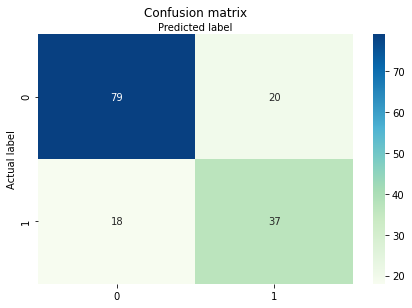

In [8]:
#Confusion matrix visual
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = "GnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
start= X_test[:,0].min()-1
print("start:", start)
stop = X_test[:,0].max()+1
print("stop:", stop)

start: -2.1305233527587832
stop: 3.796298841201446


In [10]:
#Problem 2
#Naive Bays method
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [11]:
#prediction
Y2_Pred = classifier.predict(X_test)
#confusion and accuracy
cmatrix = confusion_matrix(Y_test, Y2_Pred)
print("Accuracy:", accuracy_score(Y_test, Y2_Pred))
print("Precision:", precision_score(Y_test, Y2_Pred))
print("Recall:", recall_score(Y_test, Y2_Pred))

Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091


Text(0.5, 257.44, 'Predicted label')

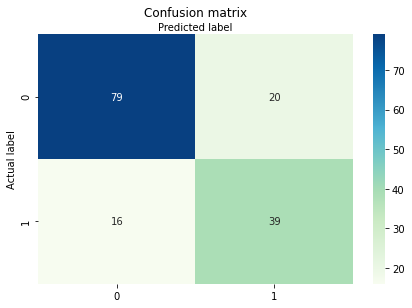

In [12]:
#Confusion matrix visual 2
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot = True, cmap = "GnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [13]:
#Problem 3
#Import required libraries for KFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer

#Read csv file
X = dataset.iloc[:, [0, 7]]
Y = dataset.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [14]:
scoring = {'accuracy' : 'accuracy', 
           'precision' : 'precision',
           'recall' : 'recall'}
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [15]:
#K=5
cv = KFold(n_splits=5, random_state=42, shuffle=True)
results = cross_validate(clf, X_test, Y_test, cv=cv, groups=None, scoring = scoring)
#results
print("K = 5")
print("Accuracy:", np.mean(results['test_accuracy']))
print("Precision:", np.mean(results['test_precision']))
print("Recall:", np.mean(results['test_recall']))

K = 5
Accuracy: 0.6956989247311828
Precision: 0.6107142857142857
Recall: 0.37914529914529915


Text(0.5, 257.44, 'Predicted label')

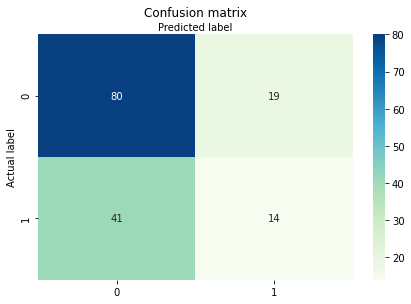

In [16]:
#Confusion Matrix for 3a
pred3 = clf.predict(X_test)
cmatrix = confusion_matrix(Y_test, pred3)
#Confusion matrix visual 3
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot = True, cmap = "GnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
import warnings
warnings.filterwarnings("ignore")
#K=10
cv2 = KFold(n_splits=10, random_state=42, shuffle=True)
results2 = cross_validate(clf, X_test, Y_test, cv=cv2, groups=None, scoring = scoring)
#results
print("K = 10")
print("Accuracy:", np.mean(results2['test_accuracy']))
print("Precision:", np.mean(results2['test_precision']))
print("Recall:", np.mean(results2['test_recall']))

K = 10
Accuracy: 0.6775
Precision: 0.5900000000000001
Recall: 0.3271428571428572


Text(0.5, 257.44, 'Predicted label')

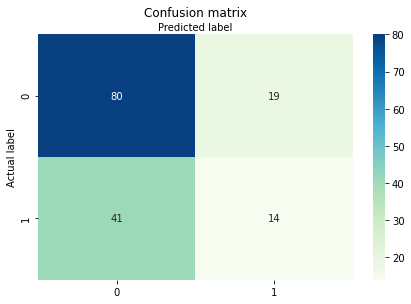

In [18]:
#Confusion Matrix for 3b
pred3b = clf.predict(X_test)
cmatrix = confusion_matrix(Y_test, pred3b)
#Confusion matrix visual 4
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot = True, cmap = "GnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [19]:
#Problem 4

#Read csv file
X = dataset.iloc[:, [0, 7]]
Y = dataset.iloc[:, 8]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 42)

#Naive Bays method
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

#Apply K fold K=10
gnbRes = cross_validate(classifier, X_train, Y_train, cv = 10, scoring='accuracy')

#prediction
Y3_Pred = classifier.predict(X_test)
#confusion and accuracy
cmatrix = confusion_matrix(Y_test, Y3_Pred)
print("Accuracy:", accuracy_score(Y_test, Y3_Pred))
print("Precision:", precision_score(Y_test, Y3_Pred))
print("Recall:", recall_score(Y_test, Y3_Pred))


Accuracy: 0.6168831168831169
Precision: 0.46153846153846156
Recall: 0.43636363636363634


Text(0.5, 257.44, 'Predicted label')

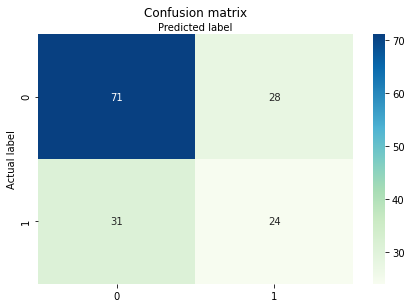

In [20]:
#Confusion matrix visual 5
import seaborn as sns
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#Heatmap
sns.heatmap(pd.DataFrame(cmatrix), annot = True, cmap = "GnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')